### 1.2 CUSTOMER CHURN PREDICTION 

Problem Statement : Build a Predictive model to estimate the likelihood of customer churn for a telecommunication company
                    The model should consider factors such as customer demographics, Usage patterns, Billing history, and Customer 
                    service Interactions

Business Objective: Minimize the Customer churn rates,
Businesss Objective challenging factors  : By identifying some external factors like Customer behaviour, Service usage,
                                           and customer demographs, Improving Customer Retention, and optimize marketing strategies

Business Constraints : Maximize the Data Privacy and Compliance, Customer Satisfaction 

### Data Description

This datset contains 21 records in that 20 columns are dependent variables and one independent variable

### Project Management for CRISP-ML(Q) 

1.Business and Data Understanding
2. Data preparation or Data Pre-processing
3. Model Building
4. Model Evaluation
5. Model Deployment
6. Monitoring and maintainence

### Data Understanding

In [1]:
## Import the required packagess

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import io

In [2]:
%cd "C:\Users\hp\Desktop\1.2 Customer churn"

C:\Users\hp\Desktop\1.2 Customer churn


In [3]:
df_churn = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [4]:
df_churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
df_churn.info()    ### Info will give the complete details of dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df_churn.shape

(7043, 21)

In [7]:
df_churn.head()   # It gives first five records 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df_churn.columns ## It gives the column labels of data frame

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
## Use the describe function  to give me the statistical summary of dataframe
df_churn.TotalCharges.describe  ##Describe Function used to generate descriptive statistics of dataframe

<bound method NDFrame.describe of 0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object>

In [10]:
## Similarly check the desc function of statistical summary for tenure column
df_churn.tenure.describe

<bound method NDFrame.describe of 0        1
1       34
2        2
3       45
4        2
        ..
7038    24
7039    72
7040    11
7041     4
7042    66
Name: tenure, Length: 7043, dtype: int64>

In [11]:
## Similarly check the desc function of statistical summary for tenure column
df_churn.MonthlyCharges.describe

<bound method NDFrame.describe of 0        29.85
1        56.95
2        53.85
3        42.30
4        70.70
         ...  
7038     84.80
7039    103.20
7040     29.60
7041     74.40
7042    105.65
Name: MonthlyCharges, Length: 7043, dtype: float64>

In [12]:
## Change the Total charges data type to float
df_churn.TotalCharges = pd.to_numeric(df_churn.TotalCharges, errors="coerce")

In [13]:
## Drop the null values
df_churn = df_churn.dropna()

In [14]:
## Check for missing values
df_churn.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
### Check the info for datafrmae whether nulls has removed or not
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

### EXPLORATORY DATA ANALYSIS (EDA)

C:\Users\hp\ana3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\ana3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 3000x1500 with 0 Axes>

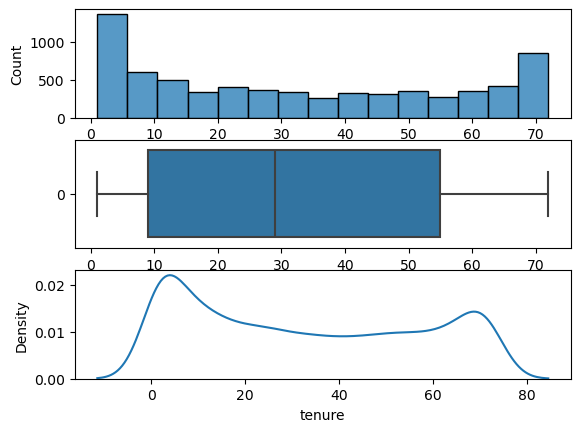

In [16]:
plt.figure(figsize=(30,15))
fog, ax = plt.subplots(3,1)
sns.histplot(df_churn.tenure, ax=ax[0])                        
sns.boxplot(df_churn.tenure, orient="h", ax=ax[1])              
sns.kdeplot(df_churn.tenure,ax=ax[2])                           
plt.show()

In [17]:
## Histogram 
#Distribution of the shape is right skewed for Tenure
 #High Frequency of customers has low tenure i.e approximately closure to zero but the new customers are joined recently 

## Boxplot
#The median value for tenure column is not equally distributed by whiskers but the median value is changed 
#For IQR range the spans approximately ranges from (10-60) months that 45% of data lies within the range
#There are nooutliers, relatively most of data falls under mid way

#Density Plot (kde)
#The kde plot had as  curved view of tenure distribution indicating that pattern is bimodal in nature
#If you consider peaks and valleys form begining of cycle is around 5 months and second smaller peak at 70 months i.e group of new and long tenured customers

<Axes: ylabel='Frequency'>

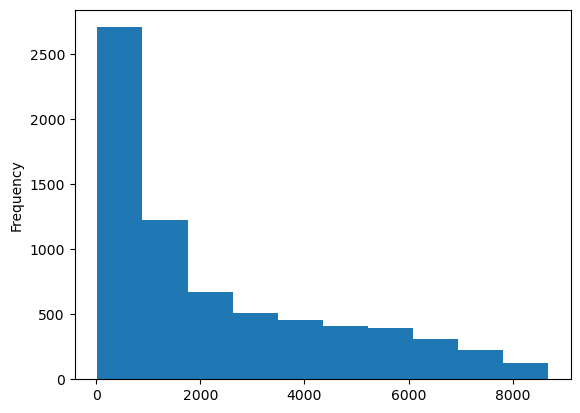

In [18]:
df_churn.TotalCharges.plot(kind = "hist")

In [19]:
## 1.High Frequency at low values 
# First bin is created near to zero i.e fixed bin has highest frequency, indicates large no. of observations with less values
# It means significant proportion values are lower in datset
#2. Gradual Decline in frequency increases when values are less common in data


## IN business case scenarios the customer lifetime value suggests many of customers has low lifetime,with some or few has higher values
## When it comes to transaction it has most less transaction amounts with fewer high-value transactions
##Finally for total charges billed for customers has declined with lower amounts only some of them have higher 

<Axes: ylabel='count'>

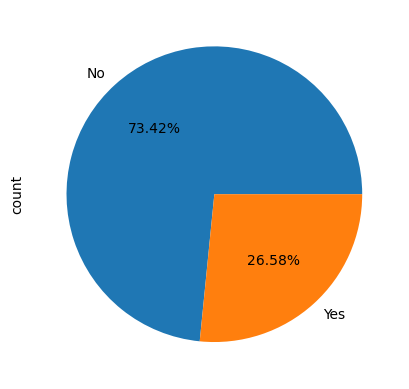

In [20]:
df_churn.Churn.value_counts().plot(kind = "pie", autopct = "%.2f%%")

From this pie-chart we can observe that the percentage of the churn is approximately 27% so that i will compare this with all other independent columns
this size of churn rate is the percentage of customers who stopped service and large churned suggests high churn rate this will be problematic so in this case the level of customers in groups can be divided and segmented 

In [21]:
df_churn.Churn.isnull().sum()   ## No missing values

0

<Axes: ylabel='count'>

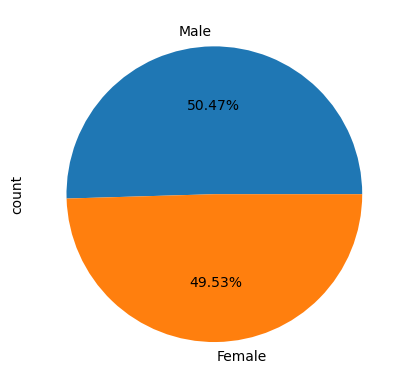

In [22]:
df_churn.gender.value_counts().plot(kind = "pie", autopct = "%.2f%%")

From this chart we can anlyse the Male and Female are approximately same 

<Axes: ylabel='count'>

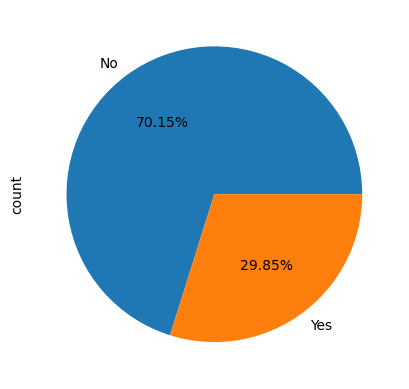

In [23]:
df_churn.Dependents.value_counts().plot(kind = "pie", autopct = "%.2f%%")

Here the marginal rate of dependents column has approximately 30% of churn rate

<Axes: xlabel='Churn'>

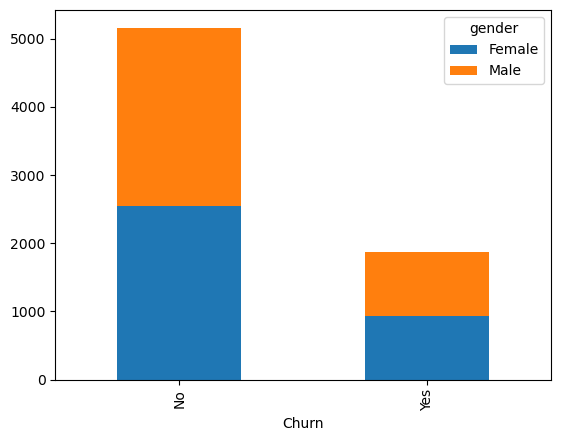

In [24]:
## Cross Tabulation & stacked bar chart -- Churn & gender , churn & contract
pd.crosstab(df_churn.Churn, df_churn.gender).plot(kind = "bar", stacked = True)

In [25]:
## For stacked bar interpretation we are comparing two groups 
# A lower bar represents no. of non-churned customers i,e (2500 for both male and female)
# A higher stacked bar indicates represents no.of churned customers(male has approximately 900 and female 1000)

## BY considering business point of view the gender bias group significantly has hugher churn rate that is major concerns should be solved
## Interactions effects might be influenced by other factors like contract type

<Axes: xlabel='Churn'>

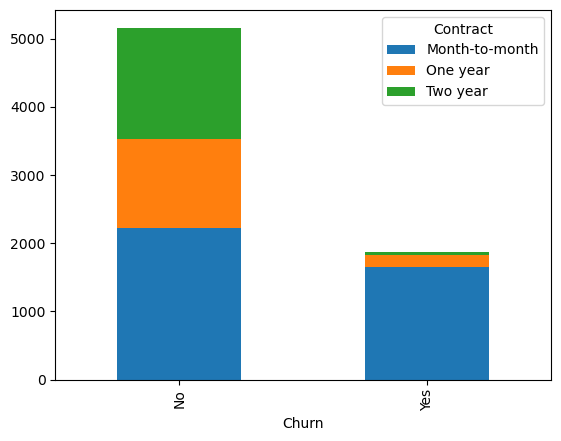

In [26]:
## Cross Tabulation for churn and contract
pd.crosstab(df_churn.Churn, df_churn.Contract).plot(kind = "bar", stacked = True)

In [27]:
### do the Groupby() -- mean of following -- 
## Tenure & Gender
##Tenure & Contract
## Total charges & Internet Service
## Total Charges & Payment method

In [28]:
df_churn.tenure.groupby(df_churn.gender).mean()

gender
Female    32.290841
Male      32.550296
Name: tenure, dtype: float64

Here Mean is equal for both male and female 

In [29]:
df_churn.tenure.groupby(df_churn.Contract).mean()

Contract
Month-to-month    18.036645
One year          42.073370
Two year          57.071810
Name: tenure, dtype: float64

In [30]:
df_churn.TotalCharges.groupby(df_churn.InternetService).mean()

InternetService
DSL            2119.789259
Fiber optic    3205.304570
No              665.220329
Name: TotalCharges, dtype: float64

In [31]:
df_churn.TotalCharges.groupby(df_churn.PaymentMethod).mean()

PaymentMethod
Bank transfer (automatic)    3079.299546
Credit card (automatic)      3071.396022
Electronic check             2090.868182
Mailed check                 1054.483915
Name: TotalCharges, dtype: float64

### HYPOTHESIS TESTING

### Test Null Average tenure of Churn Yes/No Equal

In [32]:
np.round(df_churn.tenure.groupby(df_churn.Churn).mean(), 2)

Churn
No     37.65
Yes    17.98
Name: tenure, dtype: float64

In [33]:
np.round(df_churn.tenure.groupby(df_churn.Churn).var(), 2)

Churn
No     579.70
Yes    381.46
Name: tenure, dtype: float64

In [34]:
no = df_churn[df_churn.Churn == "No"]
yes = df_churn[df_churn.Churn == "Yes"]

In [35]:
from scipy.stats import ttest_ind

In [36]:
ttest_ind(no.tenure, yes.tenure, equal_var=False) #since pvalue=2.3470747188949523e-234 is less than 0.05, Hence Reject NUll

TtestResult(statistic=34.97187009750348, pvalue=2.3470747188949523e-234, df=4045.509715421308)

In [37]:
## Test Null Average Total Charges of Churn Yes/No Equal
np.round(df_churn.TotalCharges.groupby(df_churn.Churn).mean(),2)

Churn
No     2555.34
Yes    1531.80
Name: TotalCharges, dtype: float64

In [38]:
np.round(df_churn.TotalCharges.groupby(df_churn.Churn).var(),2)

Churn
No     5426369.84
Yes    3575211.60
Name: TotalCharges, dtype: float64

In [39]:
ttest_ind(no.TotalCharges, yes.TotalCharges, equal_var=False) #Since pvalue=1.1524944112838114e-75 is less than 0.05, Reject NUll

TtestResult(statistic=18.80076821738761, pvalue=1.1524944112838114e-75, df=4042.931054911744)

In [40]:
## Test Null Average Tenure of different payment method equal
np.round(df_churn.tenure.groupby(df_churn.PaymentMethod).mean(),2)

PaymentMethod
Bank transfer (automatic)    43.71
Credit card (automatic)      43.30
Electronic check             25.17
Mailed check                 21.94
Name: tenure, dtype: float64

In [41]:
np.round(df_churn.tenure.groupby(df_churn.PaymentMethod).var(),2)

PaymentMethod
Bank transfer (automatic)    536.36
Credit card (automatic)      543.86
Electronic check             500.97
Mailed check                 450.08
Name: tenure, dtype: float64

In [42]:
banktransfer = df_churn[df_churn.PaymentMethod == "Bank transfer (automatic)"]
creditcard = df_churn[df_churn.PaymentMethod == "Credit card (automatic)"]
electroniccheck = df_churn[df_churn.PaymentMethod == "Electronic check"]
mailedcheck = df_churn[df_churn.PaymentMethod == "Mailed check"]

In [43]:
from scipy.stats import f_oneway

In [44]:
f_oneway(banktransfer.tenure, creditcard.tenure, electroniccheck.tenure, mailedcheck.tenure)
#Since pvalue=4.666987312809702e-265 is less than 0.05 then Reject Null

F_onewayResult(statistic=445.6300438001573, pvalue=4.666987312809702e-265)

### Test Null average Total charges of different Payment method is equal

In [45]:
df_churn.TotalCharges.groupby(df_churn.PaymentMethod).mean()

PaymentMethod
Bank transfer (automatic)    3079.299546
Credit card (automatic)      3071.396022
Electronic check             2090.868182
Mailed check                 1054.483915
Name: TotalCharges, dtype: float64

In [46]:
f_oneway(banktransfer.TotalCharges, creditcard.TotalCharges, creditcard.TotalCharges, mailedcheck.TotalCharges)

F_onewayResult(statistic=338.3944981925856, pvalue=1.8118924997726824e-203)

#### Test Null NO Association b/w Churn and Contract

In [47]:
### Both are Categorical so we do Chi_square test
from scipy.stats import chi2_contingency

In [48]:
chi2_contingency(pd.crosstab(df_churn.Churn, df_churn.Contract))
## Since pvalue = 7.326182186264635e-257 is less than 0.05 then Reject Null
## Alternate Hypothesis is true, that there is relation b/w churn and contract

Chi2ContingencyResult(statistic=1179.5458287339447, pvalue=7.326182186264635e-257, dof=2, expected_freq=array([[2845.08319113, 1080.76450512, 1237.15230375],
       [1029.91680887,  391.23549488,  447.84769625]]))

#### Test Null No Association b/w Churn & Payment method

In [49]:
chi2_contingency(pd.crosstab(df_churn.Churn, df_churn.PaymentMethod))
## since pvalue=1.4263098511062525e-139 is less than 0.05, then Reject Null
## Alternate Hypothesis is true that there is relation b/w churn & payment method

Chi2ContingencyResult(statistic=645.4299001234639, pvalue=1.4263098511062525e-139, dof=3, expected_freq=array([[1132.15955631, 1116.74104096, 1736.41851536, 1177.68088737],
       [ 409.84044369,  404.25895904,  628.58148464,  426.31911263]]))

 #### Test Null No Association b/w Churn & TechSupport 

In [50]:
chi2_contingency(pd.crosstab(df_churn.Churn, df_churn.TechSupport))
## Since pvalue=7.407807748843288e-180 is less than 0.05 then Reject NUll
## Alternate Hypothesis is true that there is relation b/w churn & Techsuppport

Chi2ContingencyResult(statistic=824.9255643875022, pvalue=7.407807748843288e-180, dof=2, expected_freq=array([[2549.19453925, 1116.00682594, 1497.79863481],
       [ 922.80546075,  403.99317406,  542.20136519]]))

In [51]:
df_churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [52]:
### seperating the numeric columns and obj cols
num_cols = df_churn[['tenure', 'MonthlyCharges', 'TotalCharges']]
obj_cols = df_churn[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
                     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                     'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']]

In [53]:
num_cols

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7038,24,84.80,1990.50
7039,72,103.20,7362.90
7040,11,29.60,346.45
7041,4,74.40,306.60


In [54]:
### Check the correlation fr num cols
num_cols.corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.246862,0.825880
MonthlyCharges,0.246862,1.000000,0.651065
TotalCharges,0.825880,0.651065,1.000000


In [55]:
obj_cols.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [56]:
obj_cols_dummy = pd.get_dummies(obj_cols, columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'])

In [57]:
df_churn_final = pd.concat([num_cols, obj_cols_dummy], axis=1)

In [58]:
df_churn_final

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,No,True,False,True,False,False,True,...,False,True,False,False,False,True,False,False,True,False
1,34,56.95,1889.50,No,False,True,True,False,True,False,...,False,False,True,False,True,False,False,False,False,True
2,2,53.85,108.15,Yes,False,True,True,False,True,False,...,False,True,False,False,False,True,False,False,False,True
3,45,42.30,1840.75,No,False,True,True,False,True,False,...,False,False,True,False,True,False,True,False,False,False
4,2,70.70,151.65,Yes,True,False,True,False,True,False,...,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,1990.50,No,False,True,True,False,False,True,...,True,False,True,False,False,True,False,False,False,True
7039,72,103.20,7362.90,No,True,False,True,False,False,True,...,True,False,True,False,False,True,False,True,False,False
7040,11,29.60,346.45,No,True,False,True,False,False,True,...,False,True,False,False,False,True,False,False,True,False
7041,4,74.40,306.60,Yes,False,True,False,True,False,True,...,False,True,False,False,False,True,False,False,False,True


### Data Sepertaion 

In [59]:
X = df_churn_final.drop('Churn', axis=1)
X

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,True,False,True,False,False,True,True,...,False,True,False,False,False,True,False,False,True,False
1,34,56.95,1889.50,False,True,True,False,True,False,True,...,False,False,True,False,True,False,False,False,False,True
2,2,53.85,108.15,False,True,True,False,True,False,True,...,False,True,False,False,False,True,False,False,False,True
3,45,42.30,1840.75,False,True,True,False,True,False,True,...,False,False,True,False,True,False,True,False,False,False
4,2,70.70,151.65,True,False,True,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,1990.50,False,True,True,False,False,True,False,...,True,False,True,False,False,True,False,False,False,True
7039,72,103.20,7362.90,True,False,True,False,False,True,False,...,True,False,True,False,False,True,False,True,False,False
7040,11,29.60,346.45,True,False,True,False,False,True,False,...,False,True,False,False,False,True,False,False,True,False
7041,4,74.40,306.60,False,True,False,True,False,True,True,...,False,True,False,False,False,True,False,False,False,True


In [60]:
y = df_churn_final.Churn
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7032, dtype: object

### Encoding

In [61]:
from sklearn.preprocessing import LabelEncoder

In [62]:
y = LabelEncoder().fit_transform(y)  # Target Variable

In [63]:
y

array([0, 0, 1, ..., 0, 1, 0])

#### Check the Imbalanceness

<Axes: xlabel='Churn'>

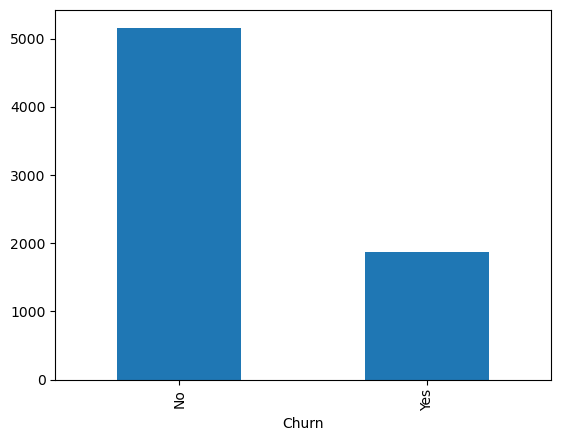

In [64]:
df_churn.Churn.value_counts().plot(kind = "bar")

### Model Buidling

####  Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
logreg = LogisticRegression(max_iter=1000)

In [67]:
logreg

LogisticRegression(max_iter=1000)

In [68]:
logreg_model = logreg.fit(X,y)
## Convergence warning means -- All coeffiecients (Beta's) are not calculated

In [69]:
logreg_model.score(X,y)

0.8063139931740614

In [70]:
log_pred = logreg_model.predict(X)

In [71]:
log_pred

array([1, 0, 0, ..., 0, 1, 0])

In [72]:
pd.crosstab(y, log_pred)  ## Confusion Matrix

col_0,0,1
row_0,,
0,4624,539
1,823,1046


In [73]:
(4624+1046)/(4624+539+823+1046) ## Verifying form the crosstabulation to check the classes imbalanecd or not

0.8063139931740614

In [74]:
from sklearn.metrics import classification_report, RocCurveDisplay

In [75]:
## Confusion matrix
print(classification_report(y,log_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      5163
           1       0.66      0.56      0.61      1869

    accuracy                           0.81      7032
   macro avg       0.75      0.73      0.74      7032
weighted avg       0.80      0.81      0.80      7032



In [76]:
## from this for churn category-1 precision is 66% out of this 34% of customer has not churned
## If you observe from recall for category for 44% customers are churn

## From business scenarios False negatives  - 44% recall i.e model might miss some of customers who are about to churn\
## False Positives - Unnecsessary actions 
## Overall if i sumup with the model misses some churned customed that can happen but by exploring the advanced techniques toimprove recall 
  # to adjust the models are targeting at hgh risk to reduce the churn rate effeciency

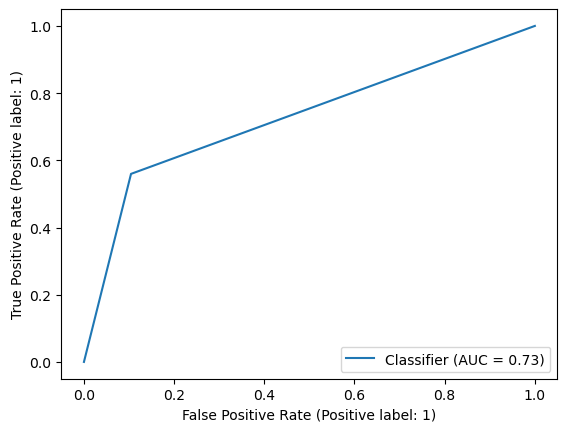

In [77]:
RocCurveDisplay.from_predictions(y,log_pred)

In [78]:
df_churn.to_excel("churn.xlsx")

In [79]:
num_cols.head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


In [80]:
X2 = num_cols
X2

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7038,24,84.80,1990.50
7039,72,103.20,7362.90
7040,11,29.60,346.45
7041,4,74.40,306.60


In [81]:
logit = LogisticRegression()
logit

LogisticRegression()

In [82]:
logreg1 = logit.fit(X2,y)
logreg1

LogisticRegression()

In [83]:
logreg1.score(X2,y)

0.7849829351535836

In [84]:
logreg1.intercept_

array([-1.59884834])

In [85]:
logreg1.coef_

array([[-0.06711264,  0.03019993,  0.00014507]])

In [86]:
logreg.intercept_

array([-0.11677285])

### Decision Tree Classifier

In [87]:
from sklearn.tree import DecisionTreeClassifier

In [88]:
dtc = DecisionTreeClassifier(max_depth=8)
dtc

DecisionTreeClassifier(max_depth=8)

In [89]:
dtm_model = dtc.fit(X,y)
dtm_model

DecisionTreeClassifier(max_depth=8)

In [90]:
dtm_model.score(X,y)

0.8343287827076223

In [91]:
from sklearn.model_selection import cross_val_score

In [92]:
cross_val_score(dtc, X, y)

array([0.78322672, 0.78109453, 0.76031294, 0.76458037, 0.78307255])

In [93]:
np.mean([0.7803838 , 0.78109453, 0.76173542, 0.76600284, 0.78520626])

0.77488457

In [94]:
dtm_pred = dtm_model.predict(X)
dtm_pred

array([1, 0, 0, ..., 0, 1, 0])

In [95]:
pd.crosstab(y, dtm_pred)  ## confusion matrix

col_0,0,1
row_0,,
0,4689,474
1,691,1178


In [96]:
(4689+1178)/(4689+474+691+1178)

0.8343287827076223

In [97]:
print(classification_report(y,dtm_pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      5163
           1       0.71      0.63      0.67      1869

    accuracy                           0.83      7032
   macro avg       0.79      0.77      0.78      7032
weighted avg       0.83      0.83      0.83      7032



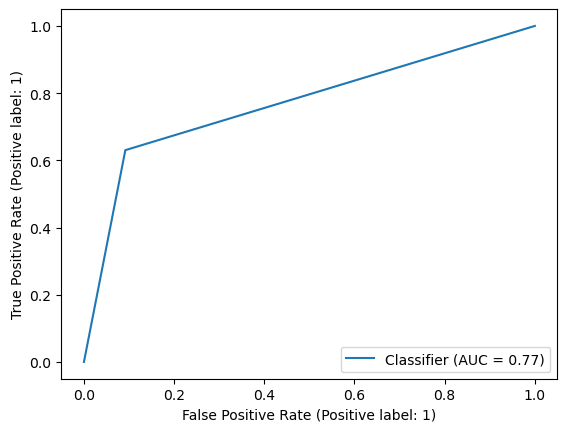

In [98]:
RocCurveDisplay.from_predictions(y,dtm_pred)  ## AUC -- 0.77

In [99]:
from sklearn.tree import plot_tree, export_text

In [100]:
print(export_text(dtm_model, feature_names=list(X.columns)))

|--- Contract_Month-to-month <= 0.50
|   |--- MonthlyCharges <= 93.67
|   |   |--- Contract_Two year <= 0.50
|   |   |   |--- StreamingMovies_Yes <= 0.50
|   |   |   |   |--- PaymentMethod_Electronic check <= 0.50
|   |   |   |   |   |--- TotalCharges <= 37.08
|   |   |   |   |   |   |--- TotalCharges <= 35.35
|   |   |   |   |   |   |   |--- PaymentMethod_Mailed check <= 0.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- PaymentMethod_Mailed check >  0.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- TotalCharges >  35.35
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- TotalCharges >  37.08
|   |   |   |   |   |   |--- OnlineSecurity_No <= 0.50
|   |   |   |   |   |   |   |--- MonthlyCharges <= 60.27
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- MonthlyCharges >  60.27
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- OnlineSecurity_No >  0.50
|   

###  Decision Tree Regressor

In [101]:
from sklearn.tree import DecisionTreeRegressor

In [102]:
dtr = DecisionTreeRegressor(max_depth=8)
dtr

DecisionTreeRegressor(max_depth=8)

In [103]:
dtr_model = dtr.fit(X,y)
dtr_model

DecisionTreeRegressor(max_depth=8)

In [104]:
dtr_model.score(X,y)

0.41588449923208537

In [105]:
from sklearn.model_selection import cross_val_score

In [106]:
cross_val_score(dtc, X, y)

array([0.78251599, 0.78109453, 0.76173542, 0.76386913, 0.78378378])

In [107]:
np.mean([0.7803838 , 0.78109453, 0.76173542, 0.76600284, 0.78520626])

0.77488457

In [108]:
dtr_pred = dtr_model.predict(X)
dtr_pred

array([0.74418605, 0.01201923, 0.31578947, ..., 0.26666667, 0.83464567,
       0.0516129 ])

In [109]:
from sklearn.tree import plot_tree, export_text

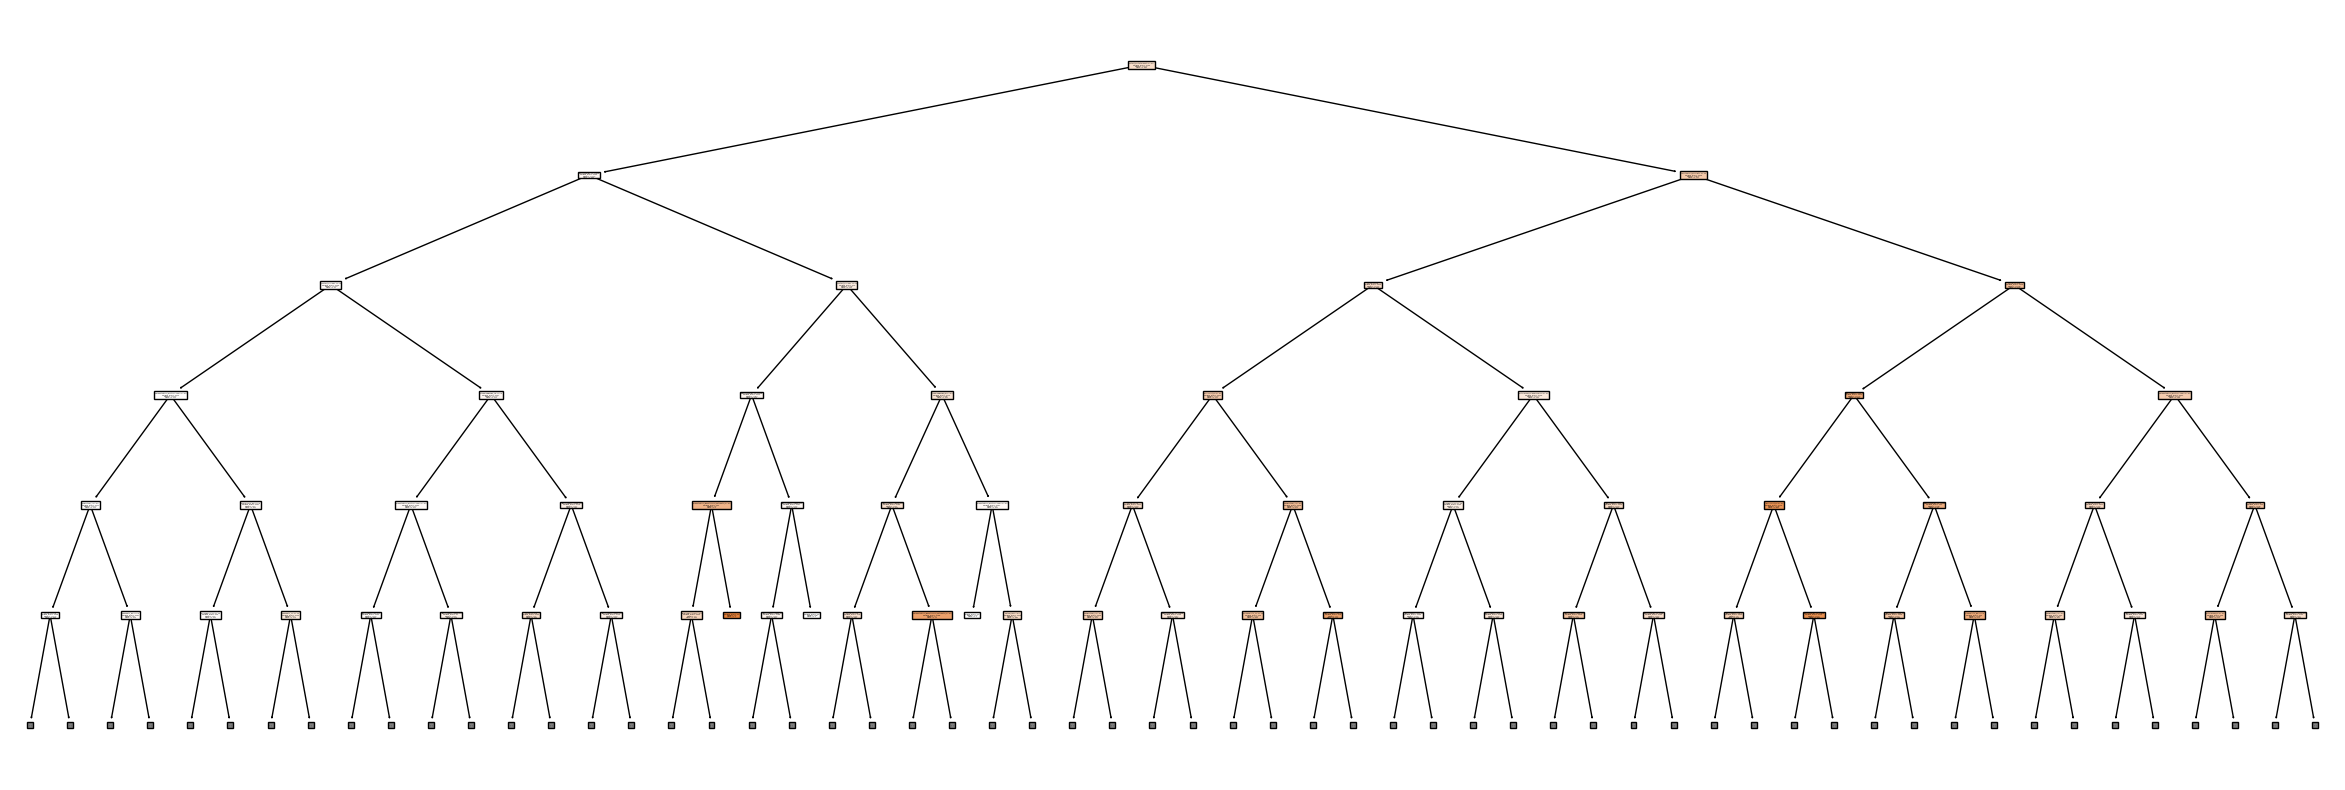

In [110]:
plt.figure(figsize=(30,10))
plot_tree(dtr_model, feature_names=X.columns.tolist(), class_names=None, filled=True, max_depth=5)
plt.show()

### Random Forest Classifier

In [111]:
from sklearn.ensemble import RandomForestClassifier

In [112]:
rtc = RandomForestClassifier(max_depth=8)
rtc

RandomForestClassifier(max_depth=8)

In [113]:
rtmmodel = rtc.fit(X,y)
rtmmodel

RandomForestClassifier(max_depth=8)

In [114]:
rtmmodel.score(X,y)

0.8276450511945392

In [115]:
from sklearn.model_selection import cross_val_score

In [116]:
cross_val_score(rtc, X, y)

array([0.80810235, 0.80739161, 0.78378378, 0.81365576, 0.80369844])

In [117]:
np.mean([0.7803838 , 0.78109453, 0.76173542, 0.76600284, 0.78520626])

0.77488457

In [118]:
rtm_pred = rtmmodel.predict(X)
rtm_pred

array([1, 0, 0, ..., 0, 1, 0])

In [119]:
pd.crosstab(y, rtm_pred)  ## confusion matrix

col_0,0,1
row_0,,
0,4773,390
1,822,1047


In [120]:
(4774+1042)/(4774+389+827+1042)

0.8270762229806599

In [121]:
print(classification_report(y,rtm_pred))

              precision    recall  f1-score   support

           0       0.85      0.92      0.89      5163
           1       0.73      0.56      0.63      1869

    accuracy                           0.83      7032
   macro avg       0.79      0.74      0.76      7032
weighted avg       0.82      0.83      0.82      7032



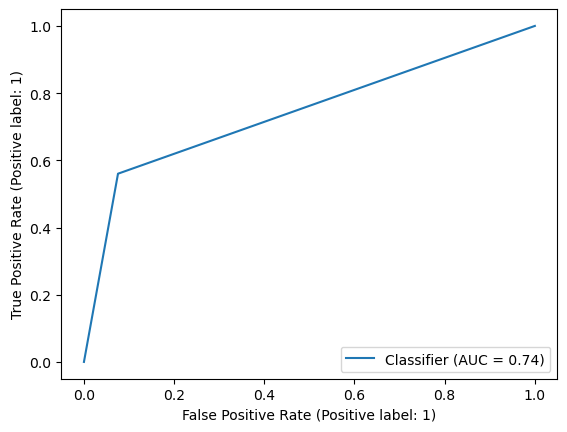

In [122]:
RocCurveDisplay.from_predictions(y,rtm_pred)  ## AUC -- 0.77

In [123]:
from sklearn.linear_model import LinearRegression

In [124]:
reg_mod = LinearRegression().fit(X,y)

In [125]:
reg_mod.score(X,y) # R-square

0.2840573969042246

In [126]:
reg_pred = reg_mod.predict(X)

In [127]:
reg_pred

array([0.47087868, 0.02826054, 0.30887206, ..., 0.3860801 , 0.6354899 ,
       0.06452489])

In [128]:
reg_resid = y - reg_pred

In [129]:
np.sqrt(np.mean(reg_resid**2) )  # RMSE

0.3737799093539415

### Ensemble method -- Gradient Boosting Regressor

In [130]:
from sklearn.ensemble import GradientBoostingRegressor

In [131]:
gbm = GradientBoostingRegressor(n_estimators=500)

In [132]:
gbmmod = gbm.fit(X,y)

In [133]:
gbmmod.score(X,y) # R -square

0.49206231930481503

In [134]:
gbm_pre = gbmmod.predict(X)

In [135]:
gbm_resid = y - gbm_pre

In [136]:
np.sqrt(np.mean(gbm_resid**2)) ## RMSE

0.3148343188099185

### Gardient Boosting Classifier

In [137]:
from sklearn.ensemble import GradientBoostingClassifier

In [138]:
gbc = GradientBoostingClassifier(n_estimators=500)

In [139]:
gbcmodel = gbc.fit(X,y)

In [140]:
gbcmodel.score(X,y) ## R square

0.8670364050056882

In [141]:
gbc_pre = gbcmodel.predict(X)

In [142]:
gbc_resid = y - gbc_pre

In [143]:
pd.crosstab(y, gbc_pre)

col_0,0,1
row_0,,
0,4852,311
1,624,1245


In [144]:
(4852+1245)/(4852+311+624+1245)

0.8670364050056882

In [145]:
print(classification_report(y,gbc_pre))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      5163
           1       0.80      0.67      0.73      1869

    accuracy                           0.87      7032
   macro avg       0.84      0.80      0.82      7032
weighted avg       0.86      0.87      0.86      7032



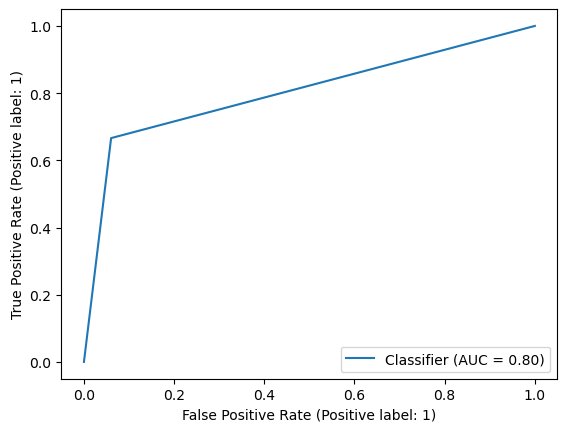

In [146]:
RocCurveDisplay.from_predictions(y,gbc_pre)  ## AUC -- 0.77

In [147]:
import pickle

In [148]:
pickle.dump(gbcmodel,open('gbcmodel.pkl', 'wb')) ### wb indicates write 

In [151]:
pkl_model = pickle.load(open('gbcmodel.pkl', 'rb')) ### rb indicates read